In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,SimpleRNN, GRU,Activation,Flatten
from tensorflow.keras.layers import Conv1D,MaxPool1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import (precision_score, recall_score,confusion_matrix,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
import pandas as pd
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/adverse.csv')

In [4]:
data.head(n=10)

,mDt,mA,mQ,vDt,vA,vQ,sDt,sA,sQ,kDt,kA,kQ,attack
0,0.469150,239.8778,86.63260,81.895500,26109.83527,71.490417,63.185077,2.380883,0.552061,4284.358131,7.187715,5.623187e+03,0
1,0.584831,254.0284,87.39760,11.010015,29161.12399,922.955914,6.777654,1.980254,42.142166,46.147515,4.539171,-2.993006e+00,0
2,0.268317,264.2912,87.12160,3.824960,33316.64000,57.238810,10.279212,1.843589,0.194673,106.640060,3.226792,-2.510400e+00,0
3,0.633453,269.3278,88.25500,11.800109,38263.72555,62.161175,6.453627,2.051226,0.469637,41.807660,4.600109,-1.385322e+00,0
4,0.366849,239.5904,88.35320,6.841095,25327.97000,894.400000,8.733525,2.131011,43.342110,77.658714,4.469999,-2.995281e+00,0
5,337.329800,617.6011,417.40730,397.387900,32948.88700,397.387900,397.387900,337.329800,337.329800,4060.933000,337.329800,2.999907e+03,1
6,337.329800,637.6204,417.40730,357.349180,35931.77300,397.387900,357.349180,337.329800,337.329800,397.387900,337.329800,3.373298e+02,1
7,2.649329,258.5290,88.37040,25991.830890,35950.37276,1297.225604,70.664632,2.064281,37.215584,4992.657556,4.664802,2.005556e+06,0
8,337.329800,637.6204,437.42667,357.349180,38073.84800,1218.182300,357.349180,337.329800,377.368530,397.387900,337.329800,3.373298e+02,1
9,0.392358,267.7104,88.02820,7.103614,38145.75800,465.896200,8.574194,1.790811,57.672188,75.146790,2.703817,-2.981833e+00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17997 entries, 0 to 17996
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mDt     17997 non-null  float64
 1   mA      17997 non-null  float64
 2   mQ      17997 non-null  float64
 3   vDt     17997 non-null  float64
 4   vA      17997 non-null  float64
 5   vQ      17997 non-null  float64
 6   sDt     17997 non-null  float64
 7   sA      17997 non-null  float64
 8   sQ      17997 non-null  float64
 9   kDt     17997 non-null  float64
 10  kA      17997 non-null  float64
 11  kQ      17997 non-null  float64
 12  attack  17997 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [6]:
data.shape

(17997, 13)

In [7]:
data.dropna(inplace=True)
data.shape

(17997, 13)

In [8]:
data['attack'].value_counts()

0    13495
1     4502
Name: attack, dtype: int64

In [9]:
data.isnull().sum()

mDt       0
mA        0
mQ        0
vDt       0
vA        0
vQ        0
sDt       0
sA        0
sQ        0
kDt       0
kA        0
kQ        0
attack    0
dtype: int64

In [10]:
print(data.groupby('attack').size())

attack
0    13495
1     4502
dtype: int64


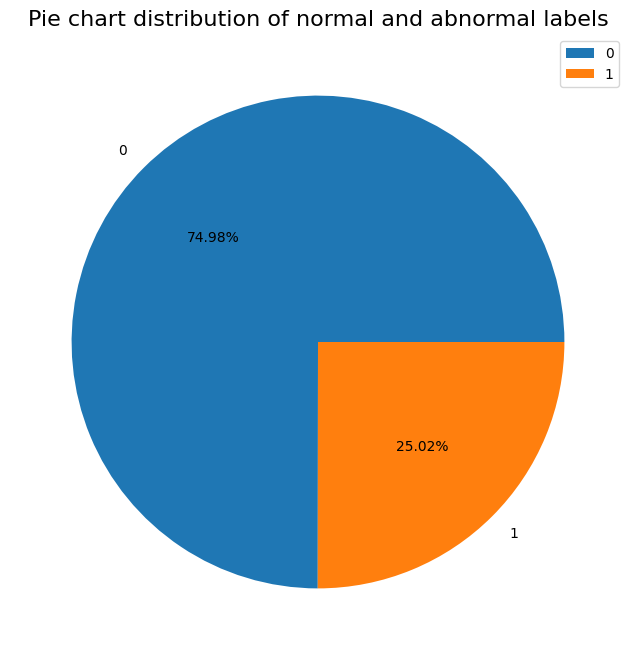

In [11]:
plt.figure(figsize=(8,8))
plt.pie(data['attack'].value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

array([[<Axes: title={'center': 'mDt'}>, <Axes: title={'center': 'mA'}>,
        <Axes: title={'center': 'mQ'}>, <Axes: title={'center': 'vDt'}>],
       [<Axes: title={'center': 'vA'}>, <Axes: title={'center': 'vQ'}>,
        <Axes: title={'center': 'sDt'}>, <Axes: title={'center': 'sA'}>],
       [<Axes: title={'center': 'sQ'}>, <Axes: title={'center': 'kDt'}>,
        <Axes: title={'center': 'kA'}>, <Axes: title={'center': 'kQ'}>],
       [<Axes: title={'center': 'attack'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

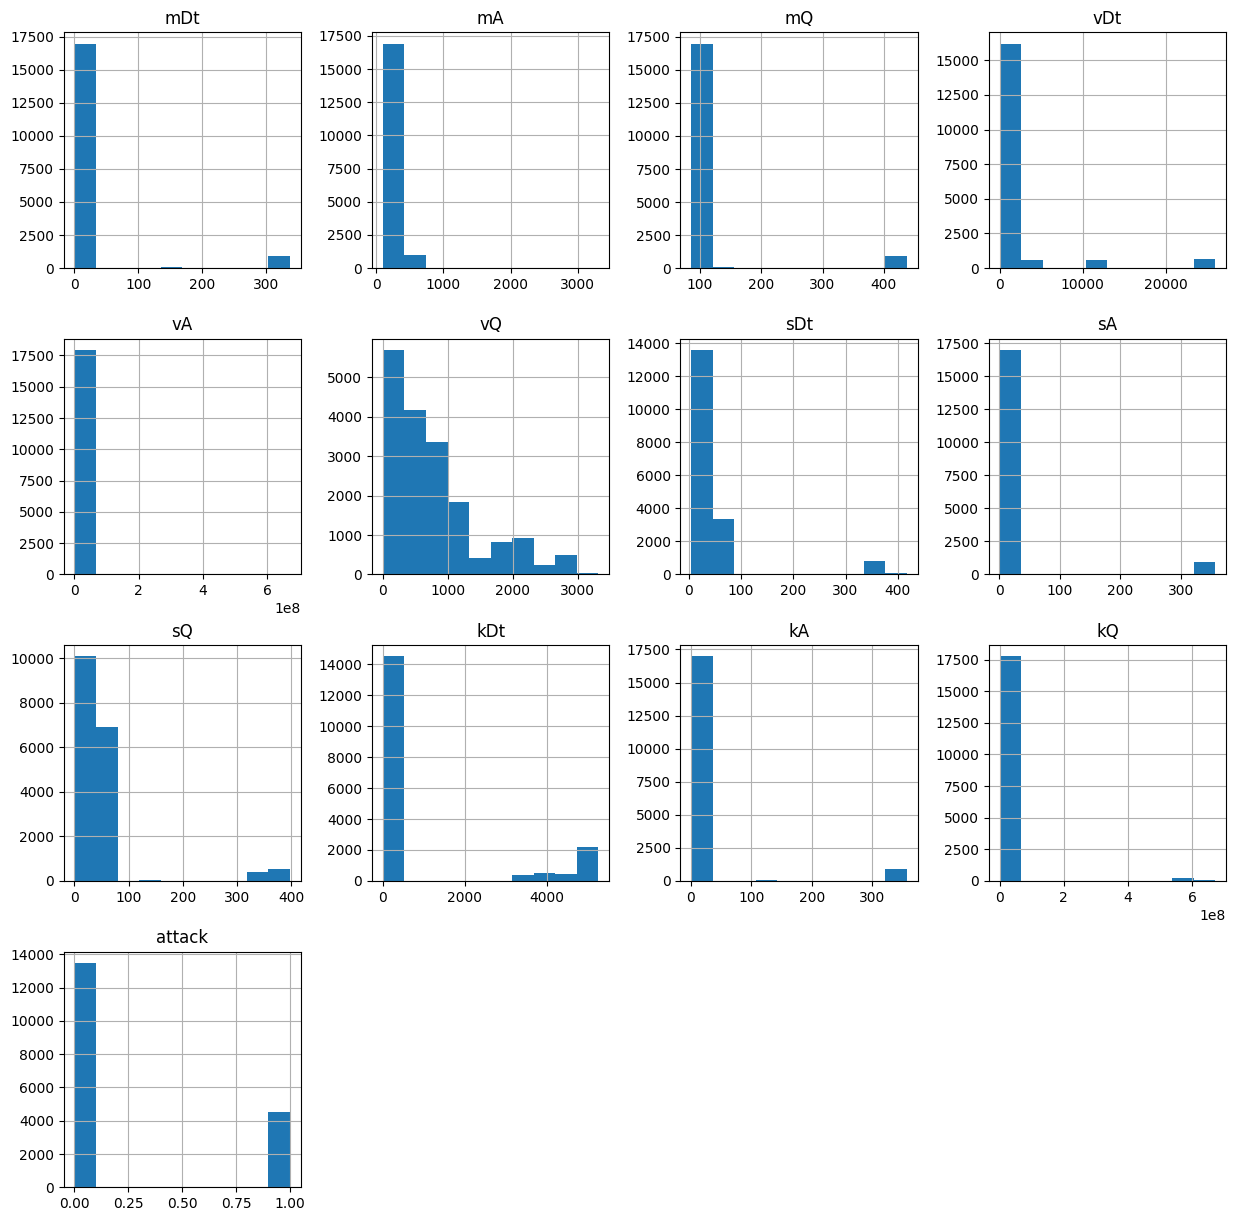

In [12]:
# Visualize the distribution of the features using histograms or box plots
data.hist(figsize=(15,15))

In [13]:
data.describe()

,mDt,mA,mQ,vDt,vA,vQ,sDt,sA,sQ,kDt,kA,kQ,attack
count,17997.000000,17997.000000,17997.000000,17997.000000,1.799700e+04,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,1.799700e+04,17997.000000
mean,18.875073,292.355547,106.152892,1451.507792,2.355384e+06,765.658062,37.770724,20.974143,47.743306,964.053949,22.883603,8.567726e+06,0.250153
std,75.221708,161.293440,76.736617,5129.752744,3.916781e+07,720.827249,79.763693,74.920600,77.819188,1806.940494,75.904277,6.706666e+07,0.433113
min,-0.054406,97.097000,86.093000,-2.999533,-2.999533e+00,-3.000000,4.835799,1.036581,-0.149014,-3.000000,0.467000,-3.300000e+00,0.000000
25%,0.392192,253.034000,87.288000,7.372901,2.933684e+04,73.350000,7.238990,1.769949,0.775000,54.862808,2.920447,-2.994000e+00,0.000000
50%,0.502000,262.157400,87.908000,9.567319,3.216428e+04,481.098000,8.185000,1.930000,37.502840,71.664804,3.763000,-2.687300e+00,0.000000
75%,0.686902,276.647000,88.588000,18.331000,3.519351e+04,1278.687400,10.588000,2.089972,53.510000,126.639175,4.893519,-5.509910e-01,1.000000
max,337.330000,3308.014000,437.427000,25994.494060,6.717387e+08,3320.216000,417.407300,357.349180,397.388000,5262.095700,357.349180,6.717387e+08,1.000000


**Data NormaliZation**

In [14]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('attack')
print(num_col)

['mDt', 'mA', 'mQ', 'vDt', 'vA', 'vQ', 'sDt', 'sA', 'sQ', 'kDt', 'kA', 'kQ']


In [15]:
dataX = data.drop(columns=['attack'],axis=1)

In [16]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [17]:
# data before normalization
dataX.head()

,mDt,mA,mQ,vDt,vA,vQ,sDt,sA,sQ,kDt,kA,kQ
0,0.469150,239.8778,86.6326,81.895500,26109.83527,71.490417,63.185077,2.380883,0.552061,4284.358131,7.187715,5623.187219
1,0.584831,254.0284,87.3976,11.010015,29161.12399,922.955914,6.777654,1.980254,42.142166,46.147515,4.539171,-2.993006
2,0.268317,264.2912,87.1216,3.824960,33316.64000,57.238810,10.279212,1.843589,0.194673,106.640060,3.226792,-2.510400
3,0.633453,269.3278,88.2550,11.800109,38263.72555,62.161175,6.453627,2.051226,0.469637,41.807660,4.600109,-1.385322
4,0.366849,239.5904,88.3532,6.841095,25327.97000,894.400000,8.733525,2.131011,43.342110,77.658714,4.469999,-2.995281


In [18]:
# calling normalization() function
dataN = normalization(dataX.copy(),num_col)

In [19]:
# Data after Normalization
dataN.head()

,mDt,mA,mQ,vDt,vA,vQ,sDt,sA,sQ,kDt,kA,kQ
0,0.001552,0.044467,0.001536,0.003266,0.000039,0.022415,0.141428,0.003773,0.001764,0.814298,0.018832,8.376006e-06
1,0.001895,0.048874,0.003713,0.000539,0.000043,0.278632,0.004707,0.002648,0.106383,0.009335,0.011410,4.570140e-10
2,0.000957,0.052071,0.002928,0.000263,0.000050,0.018127,0.013194,0.002265,0.000865,0.020824,0.007733,1.175457e-09
3,0.002039,0.053639,0.006154,0.000569,0.000057,0.019608,0.003921,0.002848,0.001556,0.008510,0.011581,2.850332e-09
4,0.001249,0.044378,0.006433,0.000379,0.000038,0.270040,0.009447,0.003072,0.109401,0.015320,0.011217,4.536273e-10


**Correlation Between Features of the Dataset**

In [20]:
num_col.append('attack')

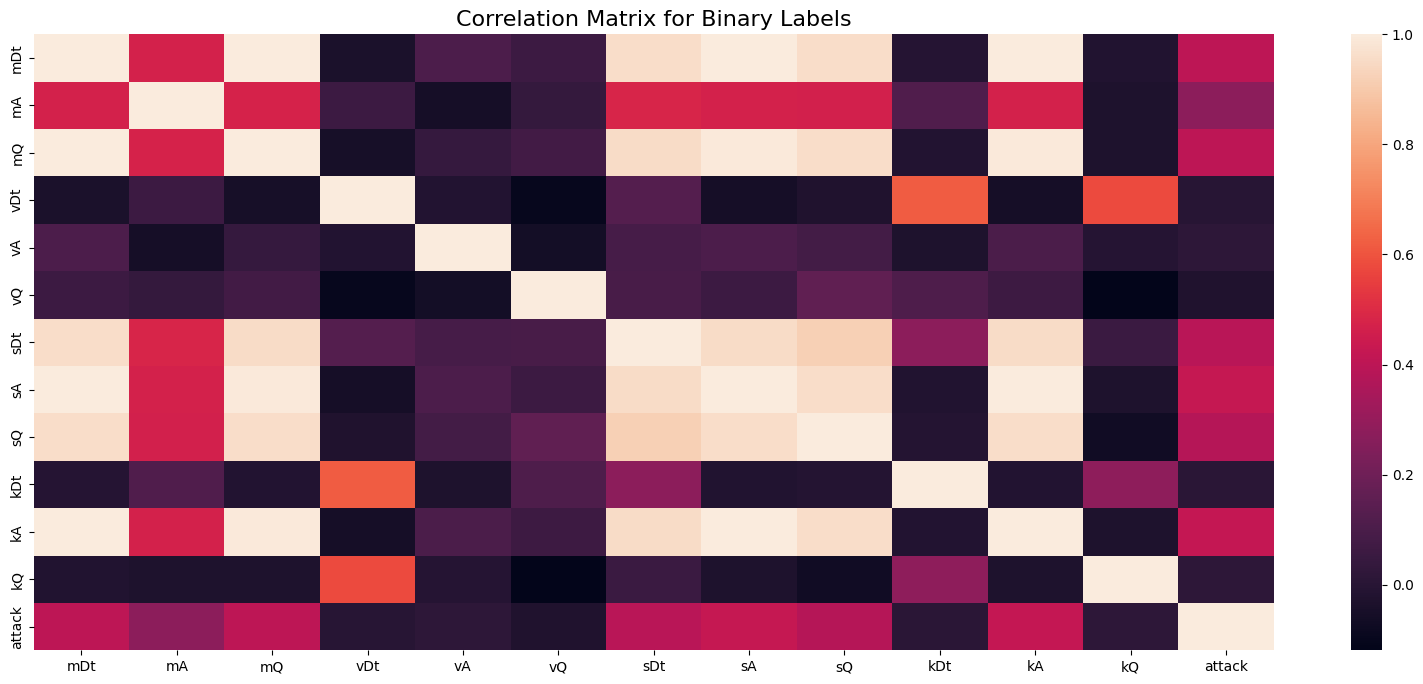

In [21]:
# Correlation Matrix for Binary Labels
import seaborn as sns
plt.figure(figsize=(20,8))
corr_bin = data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

**Perform Feature Selection using Chi=Square**

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Split the dataset into features and target variable
X = dataN.iloc[:, :-1] # Features
y = data['attack'] # Target variable
# Apply the chi-square test to select the top k features
k = 9 # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Print the names of the top k features
mask = selector.get_support()
selected_features = []
for bool, feature in zip(mask, X.columns):
    if bool:
        selected_features.append(feature)
print('Selected features:', selected_features)


Selected features: ['mDt', 'mA', 'mQ', 'vA', 'vQ', 'sDt', 'sA', 'sQ', 'kA']


In [23]:
sel_Data = dataN[selected_features]
sel_Data

,mDt,mA,mQ,vA,vQ,sDt,sA,sQ,kA
0,0.001552,0.044467,0.001536,0.000039,0.022415,0.141428,0.003773,0.001764,0.018832
1,0.001895,0.048874,0.003713,0.000043,0.278632,0.004707,0.002648,0.106383,0.011410
2,0.000957,0.052071,0.002928,0.000050,0.018127,0.013194,0.002265,0.000865,0.007733
3,0.002039,0.053639,0.006154,0.000057,0.019608,0.003921,0.002848,0.001556,0.011581
4,0.001249,0.044378,0.006433,0.000038,0.270040,0.009447,0.003072,0.109401,0.011217
...,...,...,...,...,...,...,...,...,...
17992,0.002218,0.052384,0.004520,0.000045,0.140234,0.156143,0.002126,0.146917,0.006655
17993,0.001412,0.049107,0.005229,0.000041,0.038434,0.007284,0.002280,0.038213,0.008143
17994,0.001267,0.050204,0.005177,0.000044,0.261763,0.008414,0.002937,0.114709,0.011833
17995,0.002115,0.057634,0.002374,0.000051,0.018526,0.009836,0.001792,0.002699,0.003183


**Data Splitting**

In [24]:
X = sel_Data
Y = data['attack']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=50)

In [26]:
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [28]:
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

**LSTM MODEL**

In [30]:
id=X_train.shape[2]
batch_size = 32

In [31]:
model_lstm = Sequential()
#model_dnn3.add(Flatten())
model_lstm.add(LSTM(8,input_dim=id, return_sequences=True))  
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(8, return_sequences=False))  
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.add(Activation('sigmoid'))

In [32]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing
model_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=1000, validation_data=(X_test, y_test),callbacks=[es])
model_lstm.save("lstm_model_lstm.hdf5")

Epoch 1/1000
422/422 [==============================] - 6s 5ms/step - loss: 0.5689 - accuracy: 0.7572 - val_loss: 0.4892 - val_accuracy: 0.8018
Epoch 2/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4781 - accuracy: 0.8205 - val_loss: 0.4506 - val_accuracy: 0.8358
Epoch 3/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4543 - accuracy: 0.8316 - val_loss: 0.4345 - val_accuracy: 0.8367
Epoch 4/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.8383 - val_loss: 0.4252 - val_accuracy: 0.8449
Epoch 5/1000
422/422 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.8421 - val_loss: 0.4174 - val_accuracy: 0.8464
Epoch 6/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4241 - accuracy: 0.8466 - val_loss: 0.4096 - val_accuracy: 0.8500
Epoch 7/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4146 - accuracy: 0.8477 - val_loss: 0.4010 - val_accuracy:

In [33]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


141/141 [==============================] - 1s 1ms/step


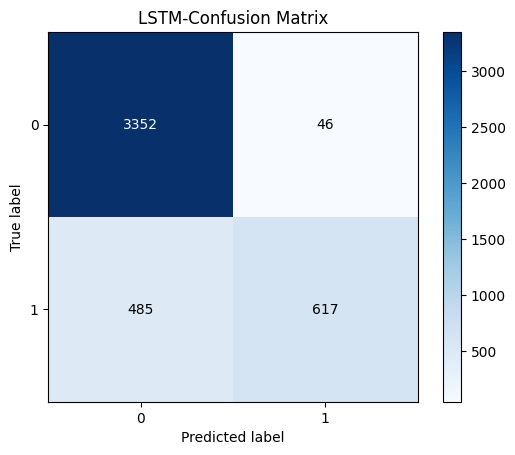

In [34]:
import scikitplot as skplt
y_pred_lstm = model_lstm.predict(X_test)
predict_classes=np.argmax(y_pred_lstm,axis=1)
######Plot confusion matrix
#accuracy_score(y_true, y_pred.round(), normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lstm.round())
plt.title("LSTM-Confusion Matrix")
plt.show()

In [35]:
from sklearn.metrics import  classification_report
print('Classifcation report:\n', classification_report(y_test, y_pred_lstm.round()))

Classifcation report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      3398
           1       0.93      0.56      0.70      1102

    accuracy                           0.88      4500
   macro avg       0.90      0.77      0.81      4500
weighted avg       0.89      0.88      0.87      4500



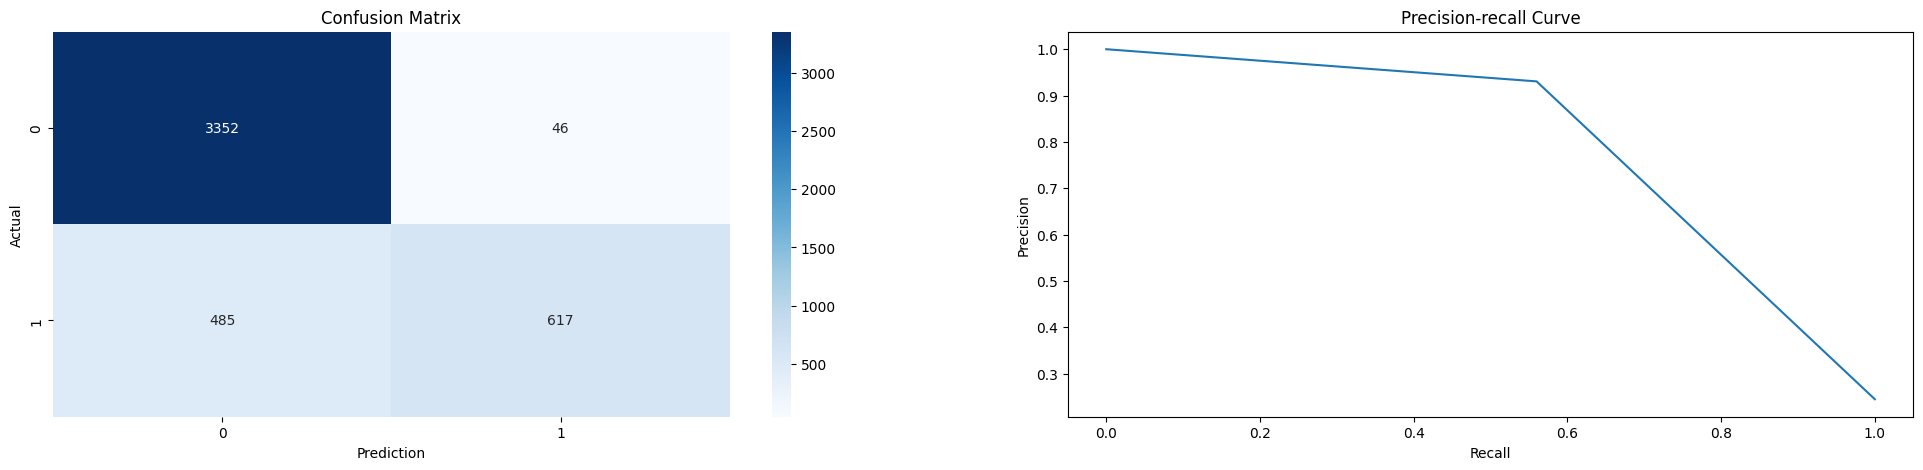

Sensitivity/Recall for LSTM Model 1 : 0.5598911070780399
Precision for LSTM Model1  : 0.9306184012066365
F1 Score for LSTM Model 1 : 0.6991501416430594
accuracy of the LSTM model 1 is:  88.2


In [36]:
from sklearn.metrics import f1_score, recall_score,precision_score,auc,roc_curve, precision_recall_curve, confusion_matrix
y_pred=y_pred_lstm.round()
matrix = confusion_matrix(y_pred=y_pred_lstm.round(), y_true=y_test)
class_names = ['0', '1']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")
precision, recall, _ = precision_recall_curve(y_test,y_pred)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()
precision_score=precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
print("Sensitivity/Recall for LSTM Model 1 : {recall_score}".format(recall_score = recall_score))
print("Precision for LSTM Model1  : {precision_score}".format(precision_score = precision_score))
print("F1 Score for LSTM Model 1 : {f1_score}".format(f1_score = f1_score))

print("accuracy of the LSTM model 1 is: ",accuracy_score(y_pred=y_pred, y_true=y_test)*100)

In [37]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')


Sensitivity: 0.5598911070780399
Specificity: 0.9864626250735727


**MODEL FOR THE DATASET WITHOUT FEATURE SELECTION**

In [38]:
X = dataN
Y = data['attack']

In [39]:
X

,mDt,mA,mQ,vDt,vA,vQ,sDt,sA,sQ,kDt,kA,kQ
0,0.001552,0.044467,0.001536,0.003266,0.000039,0.022415,0.141428,0.003773,0.001764,0.814298,0.018832,8.376006e-06
1,0.001895,0.048874,0.003713,0.000539,0.000043,0.278632,0.004707,0.002648,0.106383,0.009335,0.011410,4.570140e-10
2,0.000957,0.052071,0.002928,0.000263,0.000050,0.018127,0.013194,0.002265,0.000865,0.020824,0.007733,1.175457e-09
3,0.002039,0.053639,0.006154,0.000569,0.000057,0.019608,0.003921,0.002848,0.001556,0.008510,0.011581,2.850332e-09
4,0.001249,0.044378,0.006433,0.000379,0.000038,0.270040,0.009447,0.003072,0.109401,0.015320,0.011217,4.536273e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0.002218,0.052384,0.004520,0.017475,0.000045,0.140234,0.156143,0.002126,0.146917,0.923471,0.006655,6.876705e-06
17993,0.001412,0.049107,0.005229,0.000398,0.000041,0.038434,0.007284,0.002280,0.038213,0.012343,0.008143,7.815539e-10
17994,0.001267,0.050204,0.005177,0.000337,0.000044,0.261763,0.008414,0.002937,0.114709,0.013767,0.011833,4.510682e-10
17995,0.002115,0.057634,0.002374,0.000382,0.000051,0.018526,0.009836,0.001792,0.002699,0.014785,0.003183,1.476765e-09


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=50)
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

**LSTM MODEL FOR THE DATASET WITHOUT FEATURE SELECTION**

In [41]:
id=X_train.shape[2]
batch_size = 32

In [42]:
model_lstm = Sequential()
#model_dnn3.add(Flatten())
model_lstm.add(LSTM(8,input_dim=id, return_sequences=True))  
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(8, return_sequences=False))  
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.add(Activation('sigmoid'))

In [43]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing
model_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=1000, validation_data=(X_test, y_test),callbacks=[es])
model_lstm.save("lstm_model_lstm.hdf51")

Epoch 1/1000
422/422 [==============================] - 6s 6ms/step - loss: 0.5589 - accuracy: 0.7649 - val_loss: 0.4857 - val_accuracy: 0.8196
Epoch 2/1000
422/422 [==============================] - 2s 4ms/step - loss: 0.4736 - accuracy: 0.8202 - val_loss: 0.4491 - val_accuracy: 0.8338
Epoch 3/1000
422/422 [==============================] - 2s 6ms/step - loss: 0.4495 - accuracy: 0.8289 - val_loss: 0.4341 - val_accuracy: 0.8391
Epoch 4/1000
422/422 [==============================] - 2s 6ms/step - loss: 0.4379 - accuracy: 0.8376 - val_loss: 0.4235 - val_accuracy: 0.8424
Epoch 5/1000
422/422 [==============================] - 3s 6ms/step - loss: 0.4274 - accuracy: 0.8411 - val_loss: 0.4136 - val_accuracy: 0.8467
Epoch 6/1000
422/422 [==============================] - 3s 8ms/step - loss: 0.4184 - accuracy: 0.8449 - val_loss: 0.4056 - val_accuracy: 0.8487
Epoch 7/1000
422/422 [==============================] - 2s 5ms/step - loss: 0.4103 - accuracy: 0.8463 - val_loss: 0.3975 - val_accuracy:

141/141 [==============================] - 1s 1ms/step


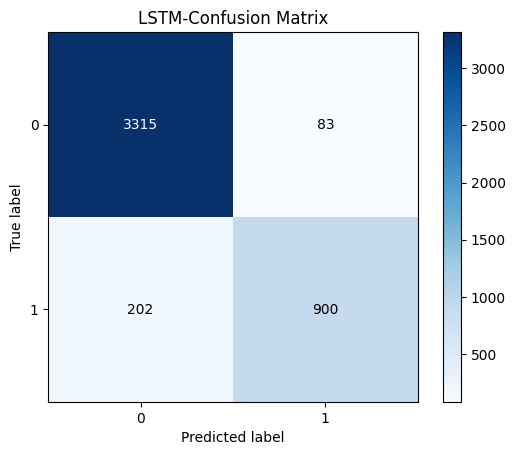

In [44]:
y_pred_lstm = model_lstm.predict(X_test)
predict_classes=np.argmax(y_pred_lstm,axis=1)
######Plot confusion matrix
#accuracy_score(y_true, y_pred.round(), normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lstm.round())
plt.title("LSTM-Confusion Matrix")
plt.show()

In [45]:
from sklearn.metrics import  classification_report
print('Classifcation report:\n', classification_report(y_test, y_pred_lstm.round()))

Classifcation report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3398
           1       0.92      0.82      0.86      1102

    accuracy                           0.94      4500
   macro avg       0.93      0.90      0.91      4500
weighted avg       0.94      0.94      0.94      4500



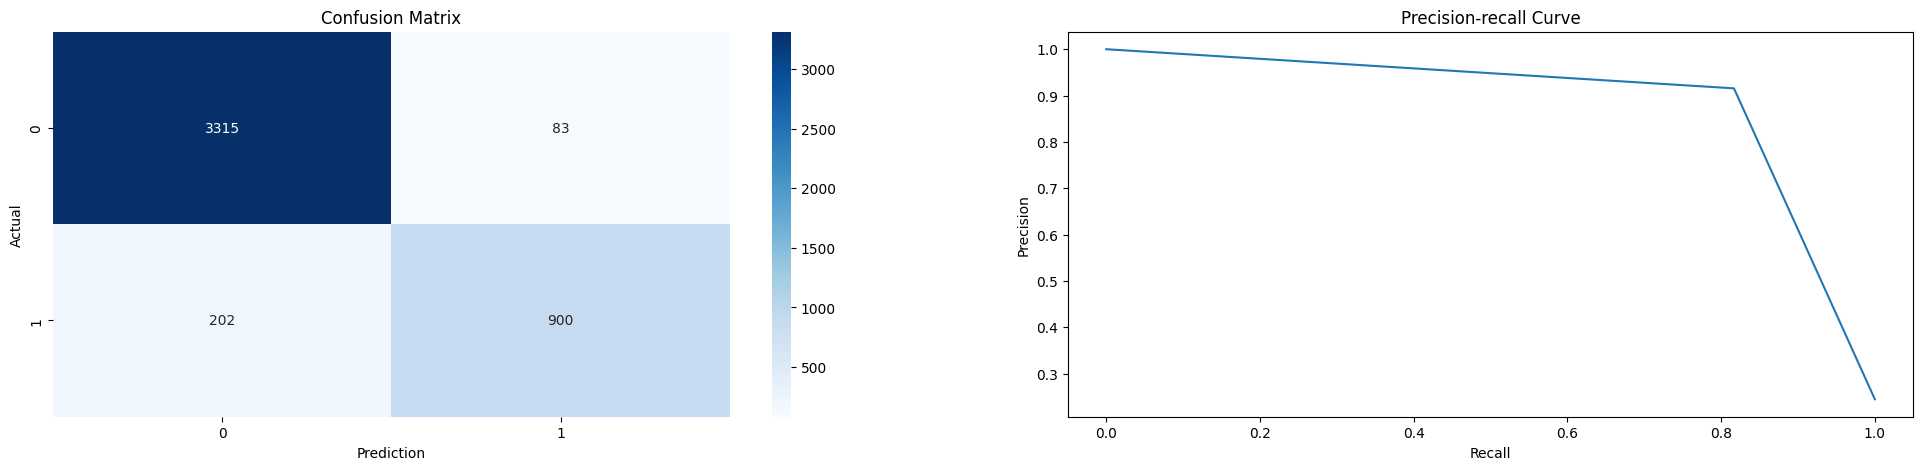

Sensitivity/Recall for LSTM Model 1 : 0.8166969147005445
Precision for LSTM Model1  : 0.9155645981688708
F1 Score for LSTM Model 1 : 0.8633093525179857
accuracy of the LSTM model 1 is:  93.66666666666667


In [46]:
from sklearn.metrics import f1_score, recall_score,precision_score,auc,roc_curve, precision_recall_curve, confusion_matrix
y_pred=y_pred_lstm.round()
matrix = confusion_matrix(y_pred=y_pred_lstm.round(), y_true=y_test)
class_names = ['0', '1']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
fig, ax = plt.subplots(1, 2, figsize=(24,5))

sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")
precision, recall, _ = precision_recall_curve(y_test,y_pred)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()
precision_score=precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
print("Sensitivity/Recall for LSTM Model 1 : {recall_score}".format(recall_score = recall_score))
print("Precision for LSTM Model1  : {precision_score}".format(precision_score = precision_score))
print("F1 Score for LSTM Model 1 : {f1_score}".format(f1_score = f1_score))

print("accuracy of the LSTM model 1 is: ",accuracy_score(y_pred=y_pred, y_true=y_test)*100)

In [47]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Sensitivity: 0.8166969147005445
Specificity: 0.9755738669805768
